In [1]:
# Packages
import pandas as pd
import numpy as np
# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, cohen_kappa_score, make_scorer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
# import graphviz
# Scaling with Minmax-scaler
from sklearn.preprocessing import MinMaxScaler

# from ydata_profiling import ProfileReport

# import custom functions
from custom_functions import our_metrics

pd.set_option('display.max_rows', 10)

# mlflow
import mlflow
from mlflow.models import infer_signature
import mlflow.sklearn

mlflow.set_tracking_uri("http://localhost:5000")
#import logging

#logging.basicConfig(level=logging.WARN)
#logger = logging.getLogger(__name__)


In [2]:
# export processed data set to csv

# export features for tree-based models
X_train_cats = pd.read_csv('../data/petfinder-adoption-prediction/train/X_train_cats_all.csv')
X_test_cats =pd.read_csv('../data/petfinder-adoption-prediction/train/X_test_cats_all.csv')


# export target
y_train_cats = pd.read_csv('../data/petfinder-adoption-prediction/train/y_train_cats.csv')
y_test_cats = pd.read_csv('../data/petfinder-adoption-prediction/train/y_test_cats.csv')


# ADA BOOST

/Users/janschlautmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 112 is smaller than n_iter=500. Running 112 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/janschlautmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/janschlautmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/janschlautmann/neuefische/ds_capstone_pet_adoptability/.v

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3867
_____________________
Weighted Quadratic Kappa: 0.3024


/Users/janschlautmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/mlflow/models/signature.py:144: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)
Successfully registered model 'KAPPA_random_search_adaboost_cats'.
2023/09/04 13:59:24 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for mod

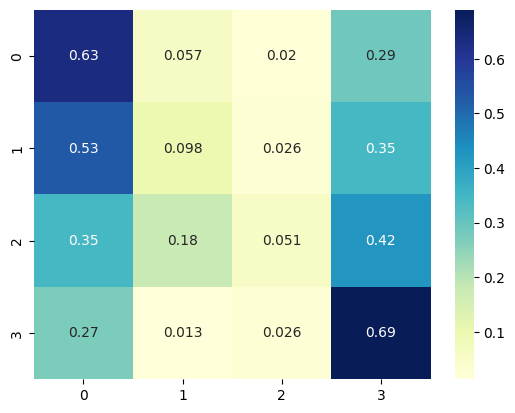

In [3]:
with mlflow.start_run(run_name="KAPPA_cats_only_ada_boost_random_search"):

    ada_classifier = AdaBoostClassifier(random_state=42)
    param_grid = {
        'n_estimators': [3,5,15,25,50,75,100],
        'learning_rate': [0.01,0.1,0.25,0.5,1,1.5,2,5],
        'algorithm': ["SAMME.R","SAMME]"]
    }
    kappa_scorer = make_scorer(cohen_kappa_score, weights='quadratic')
    random_search_acc = RandomizedSearchCV(ada_classifier, param_grid, scoring=kappa_scorer, cv=5, n_jobs=-1,n_iter=500,random_state=42)

    random_search_acc.fit(X_train_cats, y_train_cats)

    y_pred_rc = random_search_acc.predict(X_test_cats)
    our_metrics(y_test_cats, y_pred_rc, normalize=True)

    signature = infer_signature(X_test_cats, y_pred_rc)

    # Log parameter, metrics, and model to MLflow
    #mlflow.log_param("alpha", alpha)
    #mlflow.log_param("l1_ratio", l1_ratio)
    mlflow.log_param("params", random_search_acc.best_params_)
    mlflow.log_metric("acc", accuracy_score(y_test_cats,y_pred_rc))
    mlflow.log_metric("kappa", cohen_kappa_score(y_test_cats,y_pred_rc,weights="quadratic"))


    mlflow.sklearn.log_model(sk_model = random_search_acc,artifact_path="art", signature=signature,registered_model_name="KAPPA_random_search_adaboost_cats")
    mlflow.set_tag("data_source", "cats")
    mlflow.set_tag("experiment_type", "ada_boost")
    mlflow.set_tag("params", "random_search")
    mlflow.set_tag("rs_metric", "kappa")


# GRADIENT SEARCH

/Users/janschlautmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/janschlautmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/janschlautmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/janschlautmann/neuefische/ds_capstone_pet_adopta

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4005
_____________________
Weighted Quadratic Kappa: 0.3221


/Users/janschlautmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/mlflow/models/signature.py:144: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)
/Users/janschlautmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported 

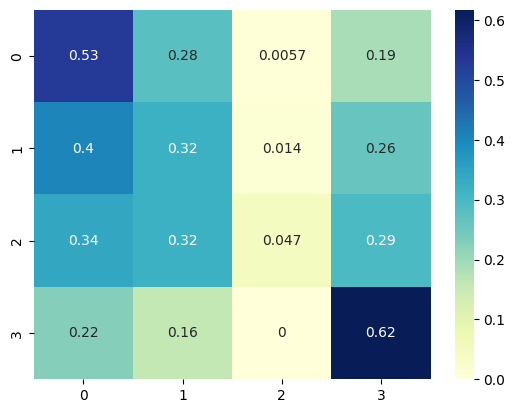

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
#
with mlflow.start_run(run_name = "KAPPA_GradientBoost_gridsearch_cats_only"):

    hist_classifier = GradientBoostingClassifier(random_state=42)
    param_grid = {
        'loss': ["log_loss", "exponential"],
        #'max_iter': [3,5,15,25,50,75,100,150],
        'learning_rate': [0.01,0.1,0.25,0.5,1],
        'max_leaf_nodes': [1,3,5,7,10,15,25,31,42],
        'max_depth': [1,2,3,5,7,9,10,15,20,None],
        #'l2_regularization': [0,0.25,0.5,0.75,1],
        'max_features': ['sqrt', 'log2'],
        'subsample': [0.1,0.5,1]
        }

    kappa_scorer = make_scorer(cohen_kappa_score, weights='quadratic')

    random_search_hist_acc = RandomizedSearchCV(hist_classifier, param_grid, scoring=kappa_scorer, cv=5, n_jobs=-1,n_iter=500,random_state=42)

    random_search_hist_acc.fit(X_train_cats, y_train_cats)

    y_pred_rc = random_search_hist_acc.predict(X_test_cats)
    our_metrics(y_test_cats, y_pred_rc, normalize=True)

    signature = infer_signature(X_test_cats, y_pred_rc)

    # Log parameter, metrics, and model to MLflow
    # #mlflow.log_param("alpha", alpha)
    mlflow.log_param("params", random_search_hist_acc.best_params_)
    mlflow.log_metric("acc", accuracy_score(y_test_cats,y_pred_rc))
    mlflow.log_metric("kappa", cohen_kappa_score(y_test_cats,y_pred_rc,weights="quadratic"))


    mlflow.sklearn.log_model(sk_model = random_search_hist_acc,artifact_path="art", signature=signature,registered_model_name="random_search_gradboost_cats_accu")
    mlflow.set_tag("data_source", "cats")
    mlflow.set_tag("experiment_type", "gradient boost")
    mlflow.set_tag("params", "random_search")
    mlflow.set_tag("rs_metric", "accu")


# Gradient Grid

In [7]:
random_search_hist_acc.best_params_

{'subsample': 0.5,
 'max_leaf_nodes': 31,
 'max_features': 'log2',
 'max_depth': 9,
 'loss': 'log_loss',
 'learning_rate': 0.01}

/Users/janschlautmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 180 is smaller than n_iter=500. Running 180 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/janschlautmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/janschlautmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/janschlautmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/py

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4013
_____________________
Weighted Quadratic Kappa: 0.3228


/Users/janschlautmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/mlflow/models/signature.py:144: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)
/Users/janschlautmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported 

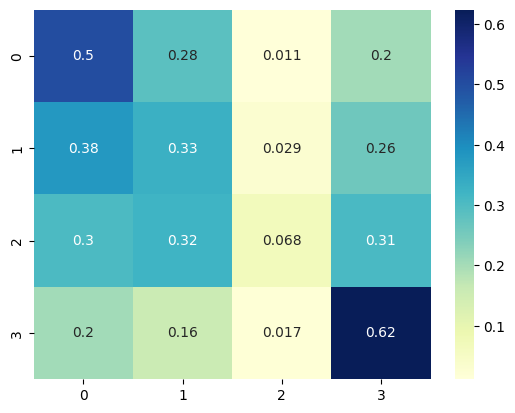

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
#
with mlflow.start_run(run_name = "KAPPA_GradientBoost_gridsearch_cats_only"):

    hist_classifier = GradientBoostingClassifier(random_state=42)
    param_grid = {
        'loss': ["log_loss",],
        #'max_iter': [3,5,15,25,50,75,100,150],
        'learning_rate': [0.005,0.01,0.015,0.02],
        'max_leaf_nodes': [27,29,31,33,35],
        'max_depth': [7,9,11],
        #'l2_regularization': [0,0.25,0.5,0.75,1],
        'max_features': ['log2'],
        'subsample': [0.4,0.5,0.6]
        }

    kappa_scorer = make_scorer(cohen_kappa_score, weights='quadratic')

    random_search_hist_acc_grid = RandomizedSearchCV(hist_classifier, param_grid, scoring=kappa_scorer, cv=5, n_jobs=-1,n_iter=500,random_state=42)

    random_search_hist_acc_grid.fit(X_train_cats, y_train_cats)

    y_pred_rc = random_search_hist_acc_grid.predict(X_test_cats)
    our_metrics(y_test_cats, y_pred_rc, normalize=True)

    signature = infer_signature(X_test_cats, y_pred_rc)

    # Log parameter, metrics, and model to MLflow
    # #mlflow.log_param("alpha", alpha)
    mlflow.log_param("params", random_search_hist_acc_grid.best_params_)
    mlflow.log_metric("acc", accuracy_score(y_test_cats,y_pred_rc))
    mlflow.log_metric("kappa", cohen_kappa_score(y_test_cats,y_pred_rc,weights="quadratic"))


    mlflow.sklearn.log_model(sk_model = random_search_hist_acc_grid,artifact_path="art", signature=signature,registered_model_name="random_search_gradboost_cats_accu")
    mlflow.set_tag("data_source", "cats")
    mlflow.set_tag("experiment_type", "gradient boost")
    mlflow.set_tag("params", "random_search")
    mlflow.set_tag("rs_metric", "accu")
